# Machine Learning Algorithms - Different Kinds with worked out example.

## Topics to cover: 
    Type of ML Algorithms
    How to choose the ML algos
    Examples on the notebook 
    
    Presenter: Aditya Narayan

## Classical difference between Software development and Machine Learning development
    "Software engineering is the art of automating a task by writing rules for a computer to follow. Machine learning goes a step further: it automates the task of writing the rules"

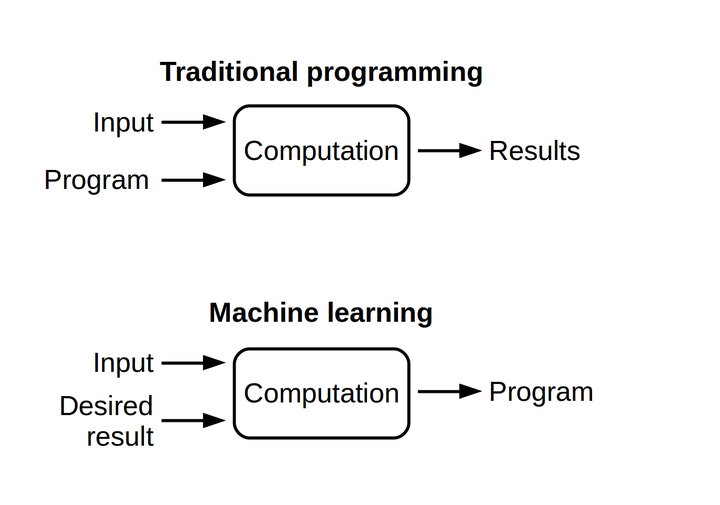

#### Software Engineers: 
    . uses their ingenuity to come up with a solution and formulate it as a precise program a computer can execute
    . needs to deal with correctness in every corner case
    . once a code is written, it can be used for 100s of years - unless a bug or enhancement is required.
    
#### Data Scientists:
    . collects input data and desired target values and applies probability/data structures to devise a program 
    that computes an output for each input value
    . needs to deal with uncertainity and variability in data
    . works in multiple iteration and exploration - to finalize a solution

    

In [29]:
import warnings
warnings.filterwarnings('ignore')

### 5 key components that play a critical role in ML Pipelines

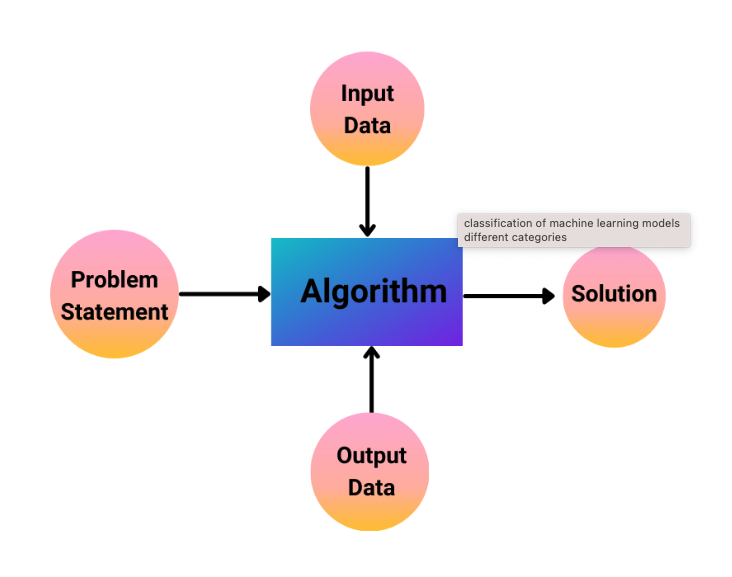

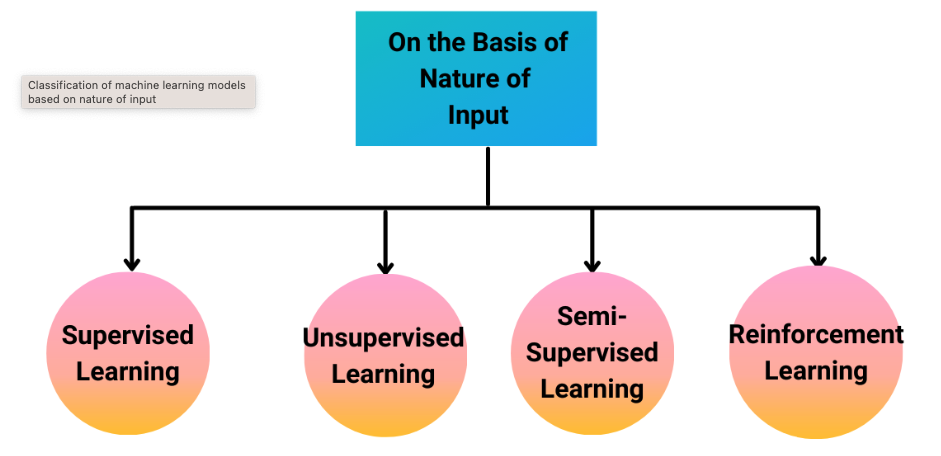

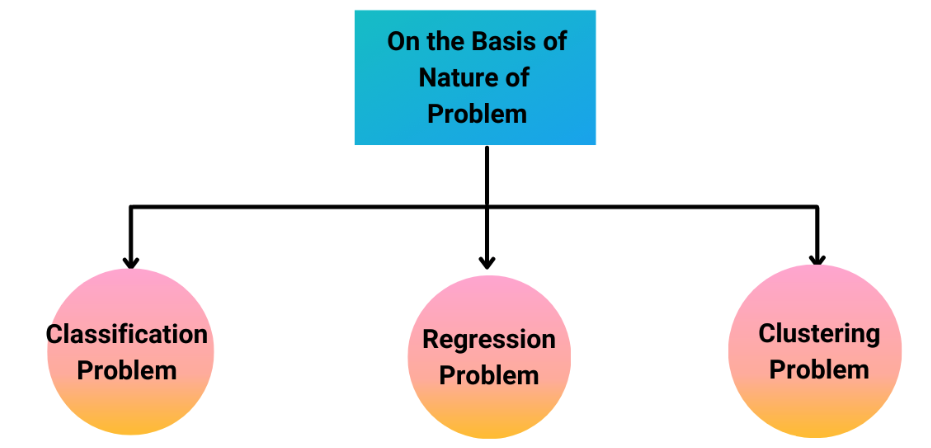

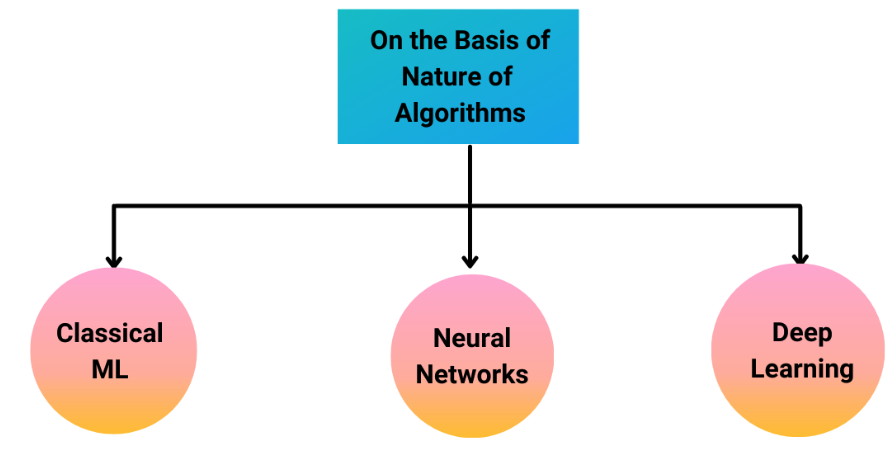

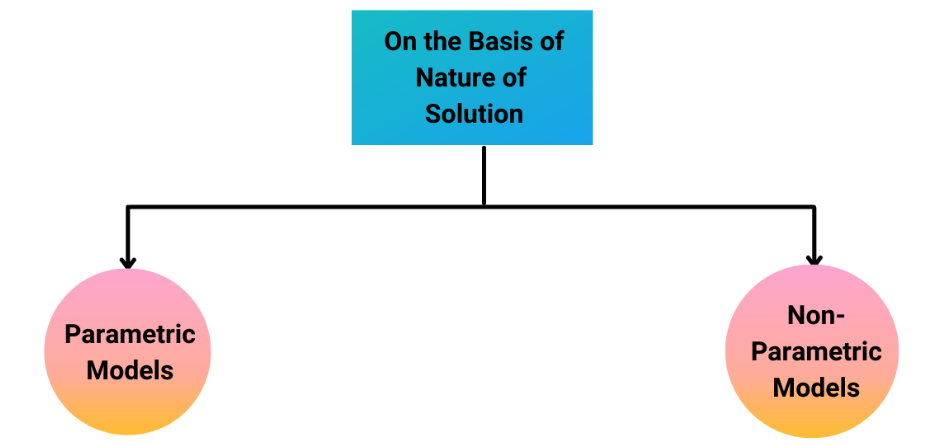

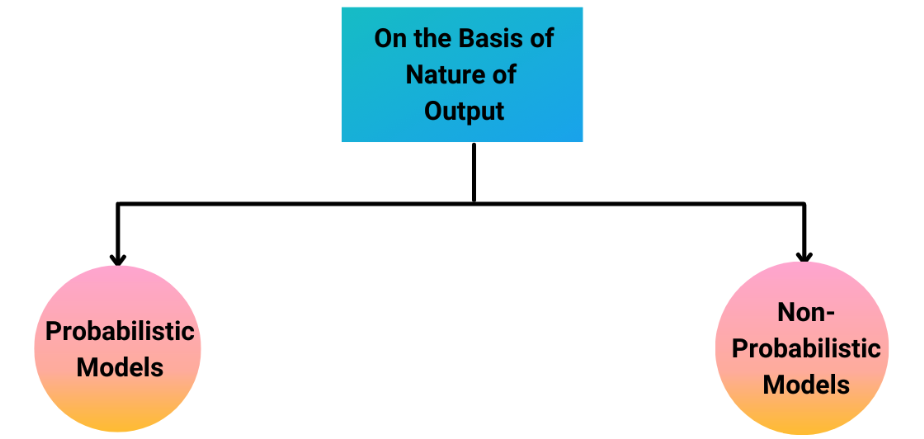

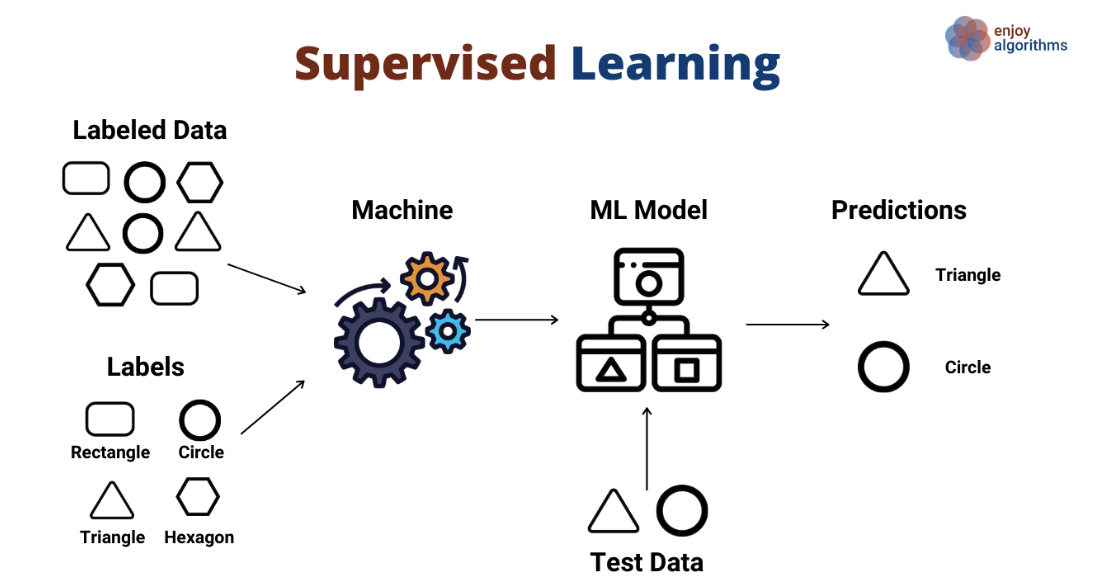

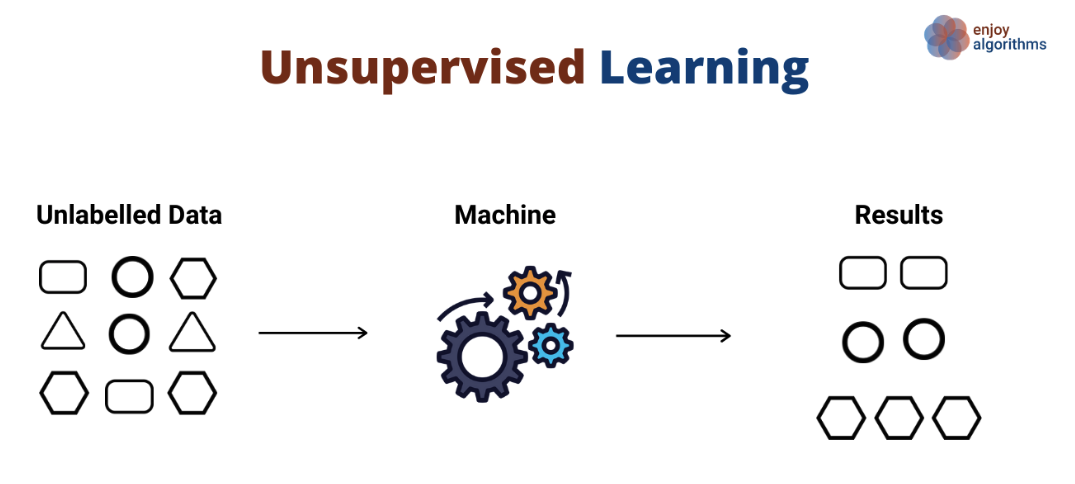

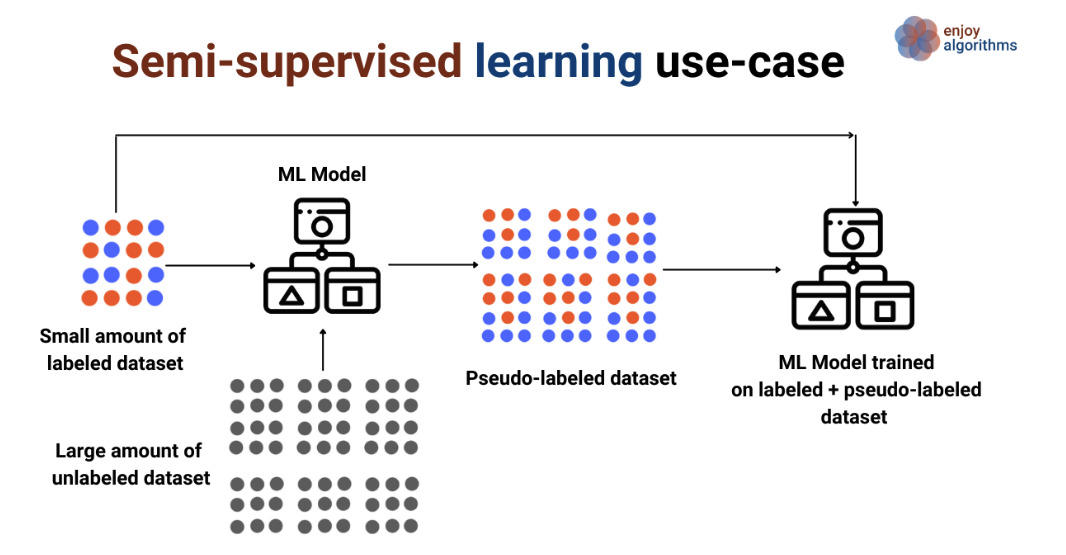

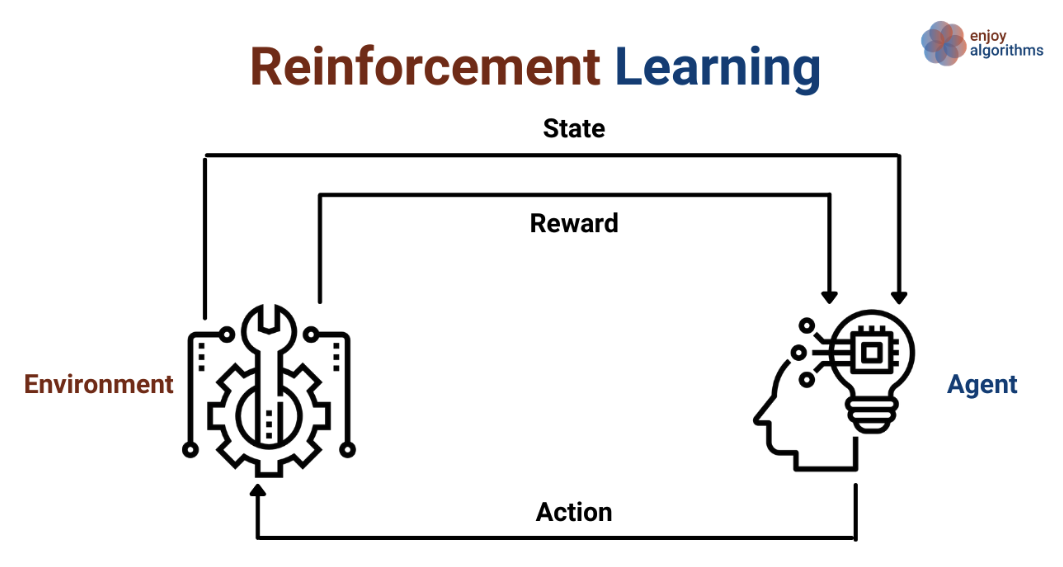

In [30]:
%reload_kedro

[03/21/23 17:58:28] INFO     Resolved project path as:                                              ]8;id=892540;file:///Users/adityan/Work/MLSP_Hackathon_2019/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=10307;file:///Users/adityan/Work/MLSP_Hackathon_2019/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#134\134]8;;\
                             /Users/adityan/Work/MLSP_Hackathon_2019/mlsp-hackathon.                               
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/21/23 17:58:30] INFO     Kedro project mlsp_hackathon                                           ]8;id=503132;file:///Users/adityan/Work/MLSP_Hackathon_2019/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=290700;file:///Users/adityan/Work/MLSP_Hackathon_2019/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#103\103]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=476393;file:///Users/adityan/Work/MLSP_Hackathon_2019/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=988171;file:///Users/adityan/Work/MLSP_Hackathon_2019/venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#104\104]8;;\
                             'pipelines'                                                                           

In [17]:
import numpy as np
import pandas as pd

In [18]:
catalog.list()

['train_data', 'test_data', 'parameters']

In [36]:
train_data = catalog.load('train_data')
train_data.head()

[03/21/23 18:27:27] INFO     Loading data from 'train_data' (CSVDataSet)...                     ]8;id=874451;file:///Users/adityan/Work/MLSP_Hackathon_2019/venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=103002;file:///Users/adityan/Work/MLSP_Hackathon_2019/venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

id program_id program_type  program_duration  test_id test_type  \
0   9389_150        Y_1            Y               136      150   offline   
1   16523_44        T_1            T               131       44   offline   
2  13987_178        Z_2            Z               120      178    online   
3   13158_32        T_2            T               117       32   offline   
4   10591_84        V_3            V               131       84   offline   

  difficulty_level  trainee_id gender            education  city_tier   age  \
0     intermediate        9389      M        Matriculation          3  24.0   
1             easy       16523      F  High School Diploma          4  26.0   
2             easy       13987      M        Matriculation          1  40.0   
3             easy       13158      F        Matriculation          3   NaN   
4     intermediate       10591      F  High School Diploma          1  42.0   

   total_programs_enrolled is_handicapped  trainee_engagement_rating  is_pass  
0                        5              N                        1.0        0  
1                        2              N                        3.0        1  
2                        1              N                        2.0        1  
3                        4              N                        1.0        1  
4                        2              N                        4.0        1

## EDA 

In [31]:
from pandas_profiling import ProfileReport

In [22]:
train_data.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [26]:
train_data.describe(include='all')

id program_id program_type  program_duration       test_id  \
count      73147      73147        73147      73147.000000  73147.000000   
unique     73147         22            7               NaN           NaN   
top     9389_150        Y_1            Y               NaN           NaN   
freq           1       6687        22560               NaN           NaN   
mean         NaN        NaN          NaN        128.208676     91.079306   
std          NaN        NaN          NaN          6.889679     51.239048   
min          NaN        NaN          NaN        117.000000      0.000000   
25%          NaN        NaN          NaN        121.000000     45.000000   
50%          NaN        NaN          NaN        131.000000     90.000000   
75%          NaN        NaN          NaN        134.000000    135.000000   
max          NaN        NaN          NaN        136.000000    187.000000   

       test_type difficulty_level    trainee_id gender            education  \
count      73147            73147  73147.000000  73147                73147   
unique         2                4           NaN      2                    5   
top      offline             easy           NaN      M  High School Diploma   
freq       43543            40101           NaN  39043                34371   
mean         NaN              NaN   9843.079620    NaN                  NaN   
std          NaN              NaN   5703.556093    NaN                  NaN   
min          NaN              NaN      1.000000    NaN                  NaN   
25%          NaN              NaN   5040.000000    NaN                  NaN   
50%          NaN              NaN   9641.000000    NaN                  NaN   
75%          NaN              NaN  14552.000000    NaN                  NaN   
max          NaN              NaN  20098.000000    NaN                  NaN   

           city_tier           age  total_programs_enrolled is_handicapped  \
count   73147.000000  45418.000000             73147.000000          73147   
unique           NaN           NaN                      NaN              2   
top              NaN           NaN                      NaN              N   
freq             NaN           NaN                      NaN          66577   
mean        2.246845     36.494033                 2.583934            NaN   
std         1.011587      9.041119                 1.240816            NaN   
min         1.000000     17.000000                 1.000000            NaN   
25%         1.000000     28.000000                 2.000000            NaN   
50%         2.000000     39.000000                 2.000000            NaN   
75%         3.000000     45.000000                 3.000000            NaN   
max         4.000000     63.000000                14.000000            NaN   

        trainee_engagement_rating       is_pass  
count                73070.000000  73147.000000  
unique                        NaN           NaN  
top                           NaN           NaN  
freq                          NaN           NaN  
mean                     2.395634      0.695408  
std                      1.325288      0.460238  
min                      1.000000      0.000000  
25%                      1.000000      0.000000  
50%                      2.000000      1.000000  
75%                      4.000000      1.000000  
max                      5.000000      1.000000

In [32]:
train_profile = ProfileReport(train_data)
train_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ID Cols (Remove)

In [37]:
id_cols = ['id','program_id','test_id','trainee_id']
train_data.drop(columns=id_cols, inplace=True)
print(train_data.shape)
train_data.head()

(73147, 12)


program_type  program_duration test_type difficulty_level gender  \
0            Y               136   offline     intermediate      M   
1            T               131   offline             easy      F   
2            Z               120    online             easy      M   
3            T               117   offline             easy      F   
4            V               131   offline     intermediate      F   

             education  city_tier   age  total_programs_enrolled  \
0        Matriculation          3  24.0                        5   
1  High School Diploma          4  26.0                        2   
2        Matriculation          1  40.0                        1   
3        Matriculation          3   NaN                        4   
4  High School Diploma          1  42.0                        2   

  is_handicapped  trainee_engagement_rating  is_pass  
0              N                        1.0        0  
1              N                        3.0        1  
2              N                        2.0        1  
3              N                        1.0        1  
4              N                        4.0        1

### Class Imbalance

### Correlation

### Imputation

### Standardization

### Encoding